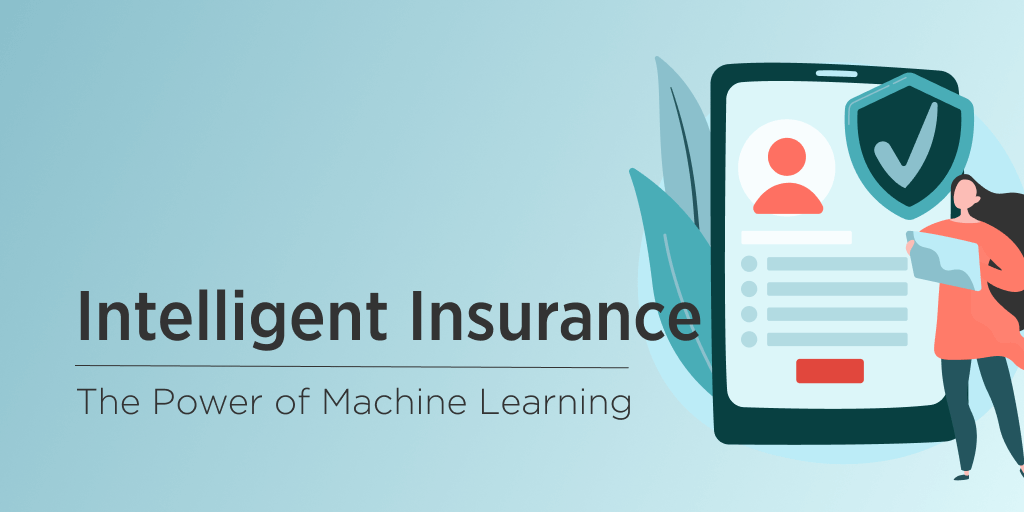

# ***Introduction***

The integration of machine learning and generative AI into healthcare promises a future where medicine is more predictive, efficient, and personalized, transforming patient care and the industry as a whole.

Machine learning (ML) models have become critical in the insurance industry, particularly in determining insurance charges for policyholders. Their application brings precision, efficiency, and fairness to the pricing process. Here's why ML models are important in this context:

**Accurate Risk Assessment** :
ML models predict risk based on individual factors like age, BMI, and smoking habits, allowing for more precise charge calculations.

**Improved Pricing Models** :
Machine learning enables data-driven decisions, leading to more accurate and personalized pricing based on historical data.

**Handling Complex Interactions** :
ML models capture intricate relationships between multiple factors (e.g., age, BMI, and smoking status) for better charge estimates.

**Efficient Claims Prediction** :
ML can predict future healthcare costs based on historical data, helping insurers set premiums that reflect anticipated expenses.

**Adaptability to Changing Data** :
Machine learning models can be updated with new data, ensuring continued accuracy and relevance in pricing.

Incorporating machine learning into the process of determining insurance charges brings significant advantages. It enables insurers to set premiums more accurately based on individual risk, predict future claims more effectively, and reduce operational inefficiencies. For policyholders, this translates into fairer pricing and better transparency regarding how their premiums are calculated.

This notebook focuses on analyzing an insurance dataset to identify key features that significantly influence the charges a policyholder will incur. Insurance pricing is determined by various factors, and applying proper machine learning (ML) models helps predict these charges more accurately. The features from the dataset that impact the outcome variable (charges) include:

age: Age of the primary beneficiary.

sex: Gender of the insurance policyholder (female, male).

bmi: Body Mass Index (BMI), a measure of body fat based on height and weight. The ideal BMI range is 18.5 to 24.9.

children: Number of dependents covered by health insurance.

smoker: Indicates whether the policyholder smokes or not.

region: The geographical region where the policyholder resides in the U.S. (Northeast, Southeast, Southwest, Northwest).

charges: The individual medical costs billed by health insurance.
Through careful analysis and machine learning modeling, we'll aim to understand how these factors contribute to predicting the insurance charges more accurately.

# ***Import Packages***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import plotly as plot
import warnings
warnings.filterwarnings('ignore')
sns.set_style()
from scipy.stats import pearsonr
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ***Data Preparation***

In [ ]:
data = pd.read_csv("insurance.csv")

In [ ]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.shape

(1338, 7)

In [ ]:
#To find out the unique values in categorical features : sex, smoker and region

print(data["sex"].value_counts())
print()
print(data["smoker"].value_counts())
print()
print(data["region"].value_counts())
print()
print(data["children"].value_counts())

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [ ]:
# Dictionary for replacing categorical values with numerical values
clean_data = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}
}
mod_data = data.copy()
mod_data.replace(clean_data, inplace=True)
print(mod_data)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       3  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       0  21984.47061
4      32    0  28.880         0       0       0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       0  10600.54830
1334   18    1  31.920         0       0       1   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       3   2007.94500
1337   61    1  29.070         0       1       0  29141.36030

[1338 rows x 7 columns]


In [ ]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
mod_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<Axes: >

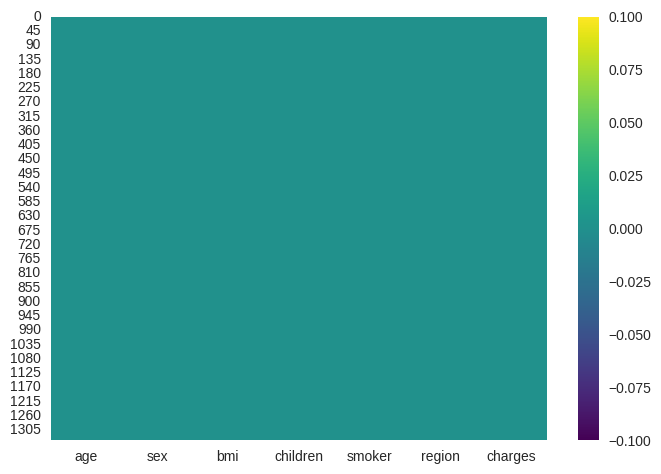

In [ ]:
# Checking for null values in the dataset.

sns.heatmap(mod_data.isnull(), cmap='viridis')

The map explains that there are ***no null values*** in the dataset

# ***Exploratory Data Analysis***

#### **Finding Correlation between Outcome variable and features.**

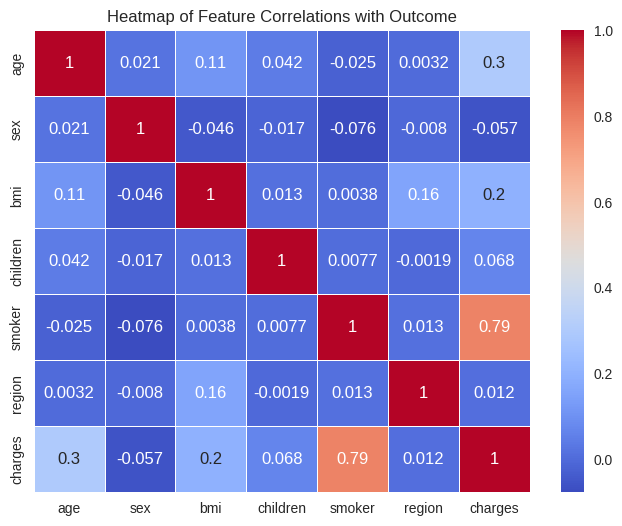

In [ ]:
# Check the relation of charge feild with that of all features

correlation_matrix = mod_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations with Outcome')
plt.show()

❗ The Smoker field is a key factor in determining an individual's health-related charges.

#### **Finding Average amount charged on the basis of sex, smoker and region.**

In [ ]:
data.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
category=data.select_dtypes(include=['object']).columns.tolist()
for i in category:
    obs=data[i].value_counts()
    avg_claim=data.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of Policyholders,Average Claim Amount
sex,,
male,676,"$13,956.75"
female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
smoker,,
no,1064,"$8,434.27"
yes,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
region,,
southeast,364,"$14,735.41"
northwest,325,"$12,417.58"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"


 ❗ The table provides the average charges incurred by individuals based on their gender, smoking status, and region:

**Sex** : On average, male policyholders have higher charge amounts compared to female policyholders averaging to $13,956.75.

**Smoker** : Among the 1,338 policyholders, 274 are smokers, with an average charge amount of $32,050.23, significantly higher than the average charge amount of non-smokers.

**Region** : Policyholders are distributed across four regions. Those
residing in the Southeast region have the highest average charge amount, at
$14,735.41.


This data aligns with the findings from the heatmap, which identified a strong correlation between the charges field and the smoker feature, confirming that smoking status has the most significant impact on the amount of charge incurred.




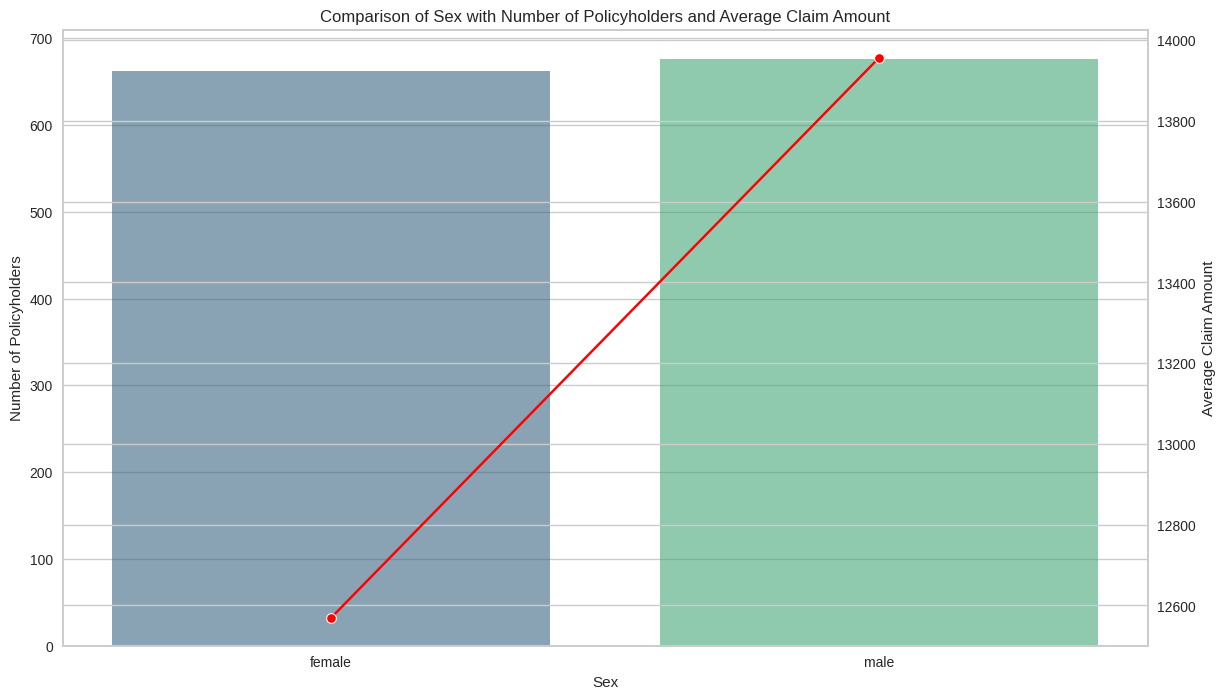

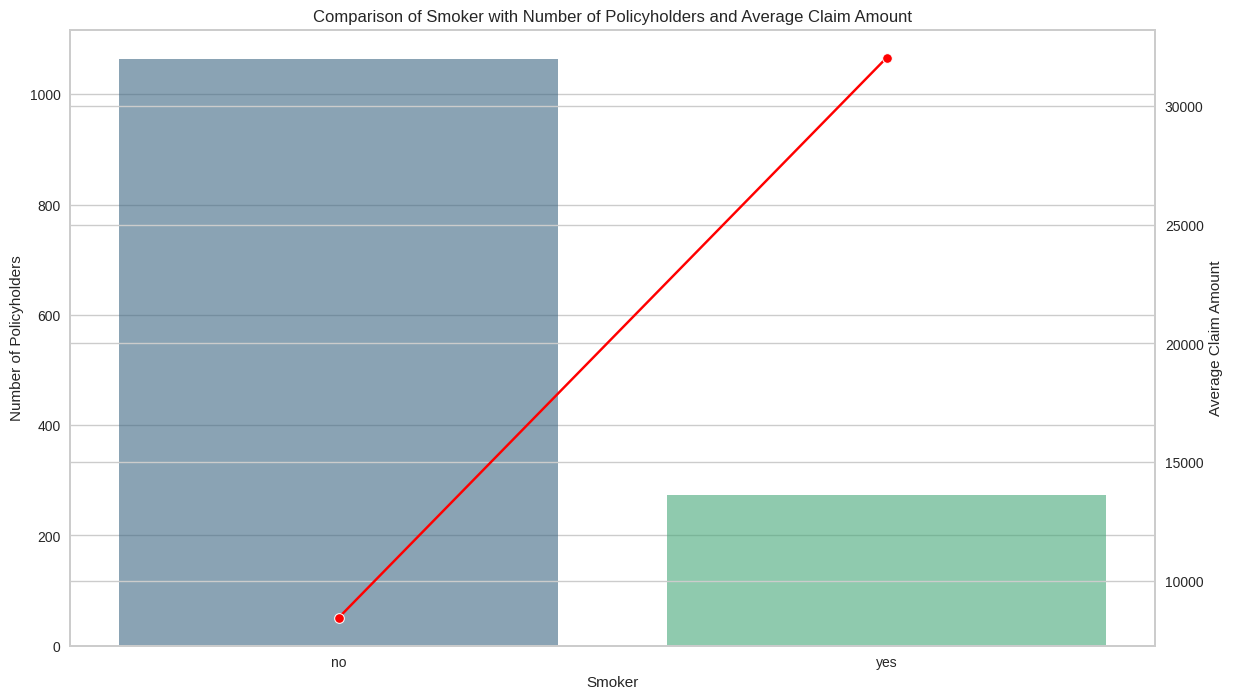

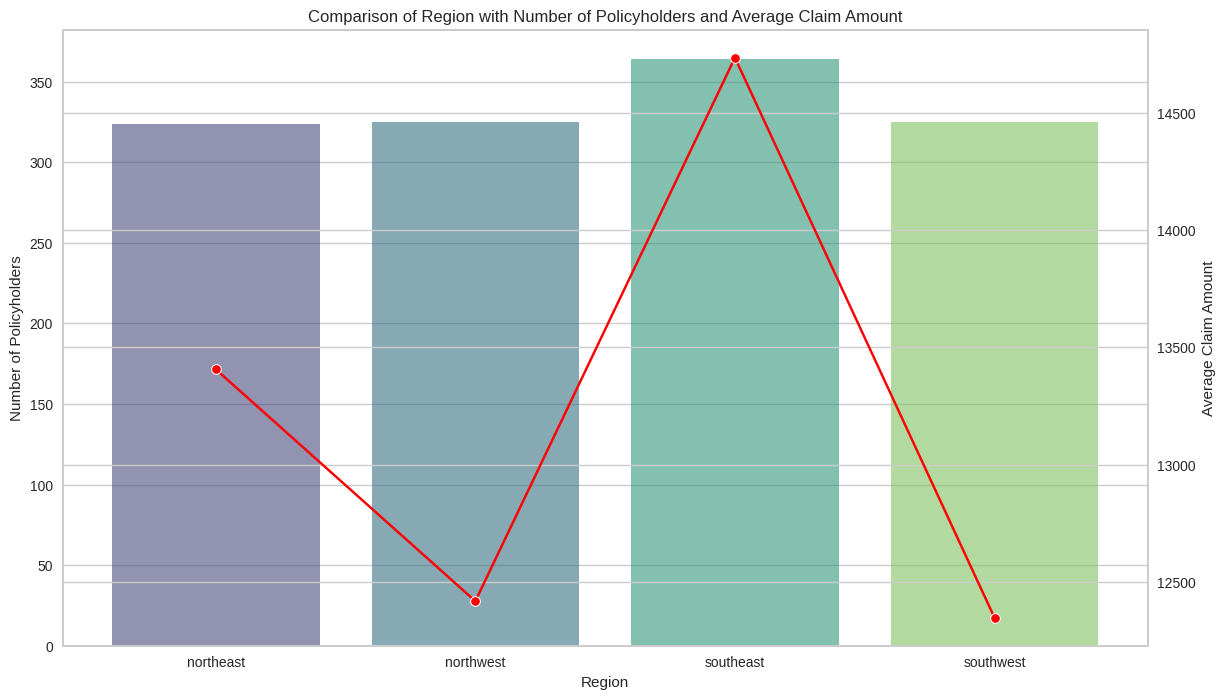

In [ ]:
# Graphical representaion of sex, smoker, children and region in relation to average charges per category.

categorical_features = data.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    counts = data[feature].value_counts()
    avg_charges = data.groupby(feature)['charges'].mean()

    plot_data = pd.DataFrame({
        'Number of Policyholders': counts,
        'Average Claim Amount': avg_charges
    }).reset_index().rename(columns={feature: 'Category'})

    fig, ax1 = plt.subplots(figsize=(14, 8))

    #Plotting
    sns.barplot(x='Category', y='Number of Policyholders', data=plot_data, palette='viridis', alpha=0.6, ax=ax1)
    ax1.set_ylabel('Number of Policyholders')
    ax1.set_xlabel(feature.capitalize())

    #Plotting for secondary y axis
    ax2 = ax1.twinx()
    sns.lineplot(x='Category', y='Average Claim Amount', data=plot_data, color='red', marker='o', ax=ax2)
    ax2.set_ylabel('Average Claim Amount')


    plt.title(f'Comparison of {feature.capitalize()} with Number of Policyholders and Average Claim Amount')
    plt.show()

❗ The graphs illustrate the following insights:

**Gender** : The distribution of policyholders between males and females is nearly equal, and the average charges claimed are quite similar for both genders. This indicates that sex has a minimal impact on the amount of charge.

**Smoking Status** : There are 274 smokers compared to 1,064 non-smokers. Despite the significantly smaller number of smokers, the average charge amount for smokers is substantially higher, at $32,050.23. This is $23,615.96 more than the average charge amount for non-smokers, highlighting a strong positive correlation between smoking status and the amount of charge.

**Region** : The policyholders are relatively evenly distributed across the four regions—northeast, northwest, southeast, and southwest. The average charges are fairly consistent across these regions, with no significant disparities observed.

**Number of Dependents** : The average charges do not show a clear relationship with the number of dependents. There is no noticeable trend indicating that a higher number of dependents increases or decreases the average charges.

#### **Finding the effects of number of children on the total charged amount.**

In [ ]:
children_charges_stats = data.groupby('children')['charges'].describe()
print(children_charges_stats)

          count          mean           std        min          25%  \
children                                                              
0         574.0  12365.975602  12023.293942  1121.8739  2734.421150   
1         324.0  12731.171832  11823.631451  1711.0268  4791.643175   
2         240.0  15073.563734  12891.368347  2304.0022  6284.939438   
3         157.0  15355.318367  12330.869484  3443.0640  6652.528800   
4          25.0  13850.656311   9139.223321  4504.6624  7512.267000   
5          18.0   8786.035247   3808.435525  4687.7970  5874.973900   

                  50%           75%          max  
children                                          
0          9856.95190  14440.123825  63770.42801  
1          8483.87015  15632.052050  58571.07448  
2          9264.97915  20379.276748  49577.66240  
3         10600.54830  19199.944000  60021.39897  
4         11033.66170  17128.426080  40182.24600  
5          8589.56505  10019.943975  19023.26000  


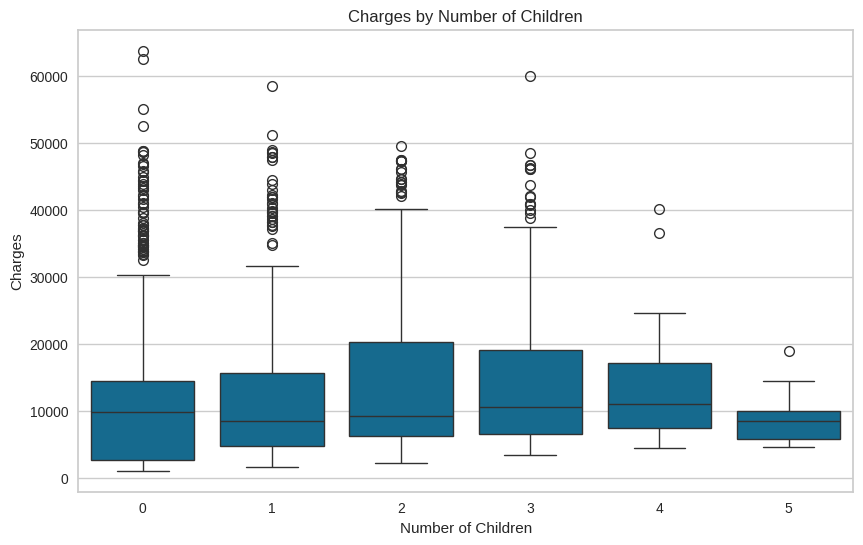

In [ ]:
# Graphical representation of the data

plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=data)
plt.title('Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

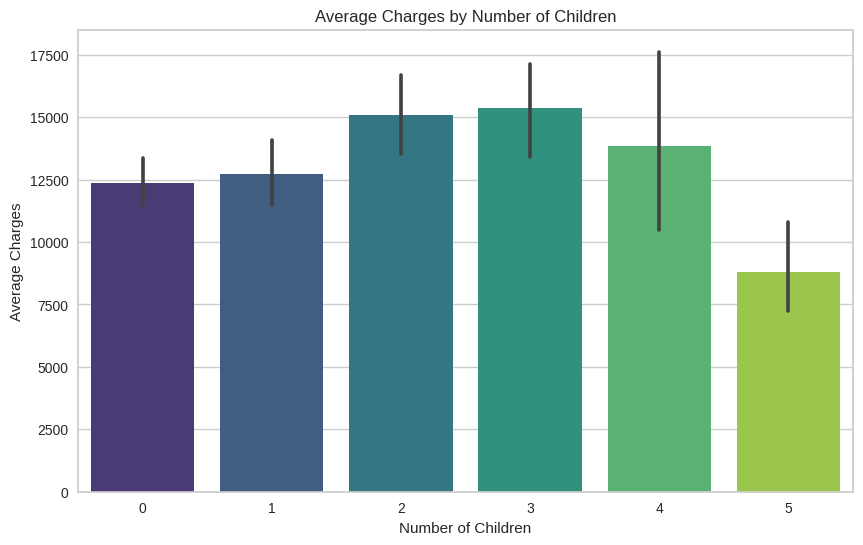

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=data, palette='viridis')
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

❗The statistics shows that the number of children do not significantly affect the charges and the charges remain fairly same regardless of the increasing number of children or dependent.

#### **Finding correlation between age and charges.**

Correlation between age and charges: 0.30


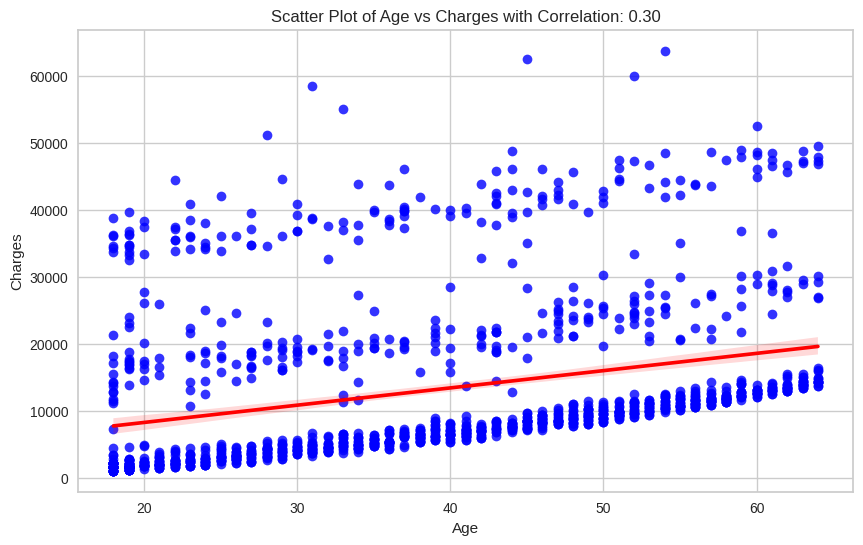

In [ ]:
# Calculate Pearson correlation
correlation, _ = pearsonr(data['age'], data['charges'])
print(f'Correlation between age and charges: {correlation:.2f}')

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Scatter Plot of Age vs Charges with Correlation: {correlation:.2f}')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

❗ The correlation of 0.30 depicts a week positive correlation. Thereby, we can state that there exist a positive correlation but extremly weak.

#### **Finding if the charges in each region pertains to smoker or non-smoker category.**

      region smoker       charges
0  northeast     no   9165.531672
1  northeast    yes  29673.536473
2  northwest     no   8556.463715
3  northwest    yes  30192.003182
4  southeast     no   8032.216309
5  southeast    yes  34844.996824
6  southwest     no   8019.284513
7  southwest    yes  32269.063494



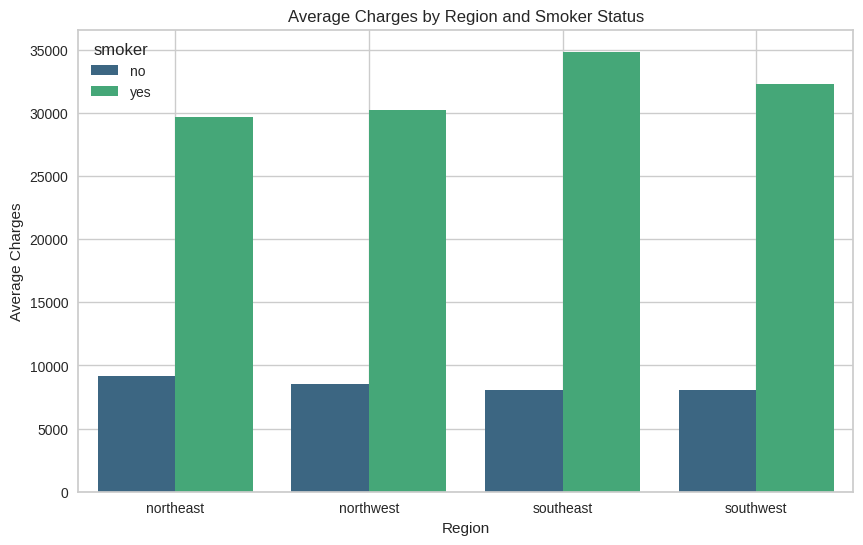

In [ ]:
avg_charges = data.groupby(['region', 'smoker'])['charges'].mean().reset_index()
print(avg_charges)
print()
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', hue='smoker', data=avg_charges, palette='viridis')

# Set plot labels and title
plt.title('Average Charges by Region and Smoker Status')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

❗ The chart determines that for all regions, policyholders that smoke pertains to be amongst the highest charge payers. The insurance providers strategise accordingly for smokers and non- smokers category to hedge their risk.

#### **Finding the distribution of charges in each region.**

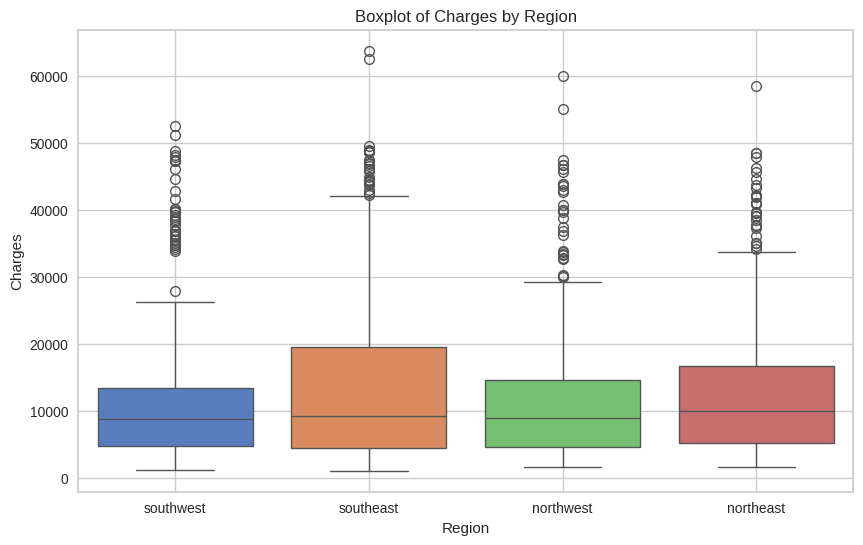

In [ ]:
# Create a boxplot for regions vs charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data, palette='muted')

# Set plot labels and title
plt.title('Boxplot of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

❗ The boxplot shows the existence of ouitliers in the data. Even though the average for the charges is highest for the southeast region, the median depicts northeast region to have more charges for policyholders generally. Another reason for the highest average charge in the southeast region could be mapped to the daunting outliers present in the data which affects the average price charged in that region.

#### **Finding the range of charges for smoker and non- smoker group.**

In [ ]:
fig= px.histogram(data, x='charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box',
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#6ead4c','#b1f08e'])
fig.update_layout(font_color="#303030", xaxis_title='Claim Amount, $',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')
fig.show()

❗ The probablity density chart shows the distribution of charges based on smoking or non-smoking status. This reveals an interesting fact about the range between which the smokers are usually charged. The data shows that smokers are majorly charged between 16000 to 34000 dollar.

#### **Checking if Body Mass Index and charges are correlated among smokers.**

In [ ]:
fig = px.scatter(data, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#107d34','#80f7a8'],height=600)
fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", xaxis=dict(title='Body Mass Index (BMI)',showgrid=False),
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()

❗Higher claim amounts are positively correlated with both body mass index (BMI) and age, indicating that individuals with higher BMI and older age tend to incur greater claim costs. This trend suggests that these individuals are more likely to face health-related challenges, driving up their insurance claims. Moreover, this pattern is particularly pronounced among smokers, whose insurance costs rise more sharply with increasing BMI compared to non-smokers.

# ***Data Analysis: Machine Learning***

Machine Learning enhances data analysis by identifying patterns and correlations between features and the outcome variable, allowing for accurate predictions of future outcomes based on these insights. The advent of machine learning and artificial intelligence has facilitated more data-driven decision-making across various industries. In this notebook, with our outcome variable being numeric (or continuous), we explore different models that are well-suited for such data, including Linear Regression, Decision Tree Regressor, Random Forest, Gradient Boosting Machine, Support Vector Regressor, K-Nearest Neighbors Regressor, Neural Networks, and Bayesian Regression.

In [ ]:
X = mod_data.drop(columns = "charges")
y = mod_data["charges"]

train_X, valid_X, train_y, valid_y = train_test_split(X, y,
                                                      test_size = 0.2,
                                                      random_state = 0)
print(train_X.info())
print()
print(valid_X.info())
print()
print(train_y.info())
print()
print(valid_y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 621 to 684
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   int64  
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   int64  
 5   region    1070 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 58.5 KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 578 to 963
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       268 non-null    int64  
 1   sex       268 non-null    int64  
 2   bmi       268 non-null    float64
 3   children  268 non-null    int64  
 4   smoker    268 non-null    int64  
 5   region    268 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.7 KB
None

<class 'pandas.core.series.Series'>
Index: 1070 entries, 62

In [ ]:
train_data = pd.concat([train_X, train_y], axis=1)

#### **Model generation using pycaret package.**

In [ ]:
!pip install pycaret

In [ ]:
!pip install mlflow

In [ ]:
# Import pycaret.regression to perform model evaluationa nd comparision,

from pycaret.regression import *
setup_data = setup(
    data=train_data,
    target='charges',
    normalize = True,
    transformation=True,
    log_experiment = True,
    session_id=123,
    experiment_name = 'Charges_01'
    )

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 7)"
4,Transformed data shape,"(1070, 7)"
5,Transformed train set shape,"(749, 7)"
6,Transformed test set shape,"(321, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
from pycaret.regression import compare_models

In [ ]:
# Compare models and return the best one
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2620.8521,22792354.5937,4631.9611,0.8430,0.4378,0.3042,0.1340
lightgbm,Light Gradient Boosting Machine,2936.0582,25007467.8885,4881.3509,0.8289,0.5409,0.3736,0.6350
rf,Random Forest Regressor,2811.1014,25316069.7350,4928.9012,0.8254,0.4835,0.3489,0.3000
et,Extra Trees Regressor,2872.9085,27934501.4350,5206.0403,0.8055,0.5099,0.3727,0.2440
ada,AdaBoost Regressor,4435.3023,29814364.8570,5400.6699,0.7917,0.6730,0.8287,0.0770
xgboost,Extreme Gradient Boosting,3160.0912,30232638.8000,5346.5754,0.7909,0.5729,0.4183,0.1420
knn,K Neighbors Regressor,3445.5360,32155190.4000,5585.5210,0.7769,0.5070,0.3893,0.1010
br,Bayesian Ridge,4368.9371,39167861.0000,6221.9829,0.7259,0.6028,0.4577,0.0590
llar,Lasso Least Angle Regression,4365.6267,39167856.8000,6222.0694,0.7259,0.5990,0.4572,0.0550
lar,Least Angle Regression,4365.8950,39169507.2000,6222.1911,0.7259,0.5978,0.4573,0.0570


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

2024/08/20 04:55:13 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/20 04:55:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/20 04:55:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/20 04:55:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/20 04:55:15 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/20 04:55:15 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

In [ ]:

print(best_model)

GradientBoostingRegressor(random_state=123)


❗ The best model for our Insurance dataset is ***Gradient Boosting Regressor.***

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# Instancing the model

gbr = create_model('gbr')
gbr

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2876.3650,25096700.2974,5009.6607,0.7873,0.4260,0.2992
1,2034.9963,10221817.9825,3197.1578,0.9142,0.3138,0.2757
2,2409.5246,21248689.5603,4609.6301,0.8664,0.4390,0.2855
3,1750.0033,7639219.0234,2763.9137,0.9335,0.3609,0.3011
4,3545.1340,44363568.4527,6660.5982,0.7241,0.5416,0.3602
5,2513.2581,18897817.8350,4347.1620,0.8540,0.4051,0.3038
6,3226.3524,31905351.6824,5648.4822,0.7770,0.5789,0.2716
7,2091.1722,12580443.2764,3546.8921,0.9149,0.3668,0.2652
8,2761.0740,22904155.7186,4785.8286,0.8796,0.3982,0.2913


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/08/20 04:56:07 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


GradientBoostingRegressor(random_state=123)

In [ ]:
# Get the parameters for gbr trained model

model_parameters = gbr.get_params()
model_parameters

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Fine tuning the gbr model for efficient model predictions.

tuned_gbr = tune_model(gbr, custom_grid={
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 0.9, 1],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [4, 10, 20]
}, optimize='MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2935.5418,25207430.5189,5020.7002,0.7864,0.4321,0.3357
1,2036.0990,9508625.9703,3083.6060,0.9202,0.3283,0.2996
2,2388.4026,19949522.7853,4466.4889,0.8745,0.4271,0.3016
3,1946.9536,8188193.4495,2861.5020,0.9287,0.3988,0.3552
4,3405.9641,40891895.6890,6394.6771,0.7456,0.4945,0.3547
5,2569.3413,20241257.5171,4499.0285,0.8436,0.4622,0.3524
6,2754.2283,25016206.7228,5001.6204,0.8251,0.4854,0.2147
7,2143.2491,12215902.8761,3495.1256,0.9174,0.3693,0.2847
8,2723.5536,22439822.1155,4737.0689,0.8821,0.3910,0.2960


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/08/20 04:57:18 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


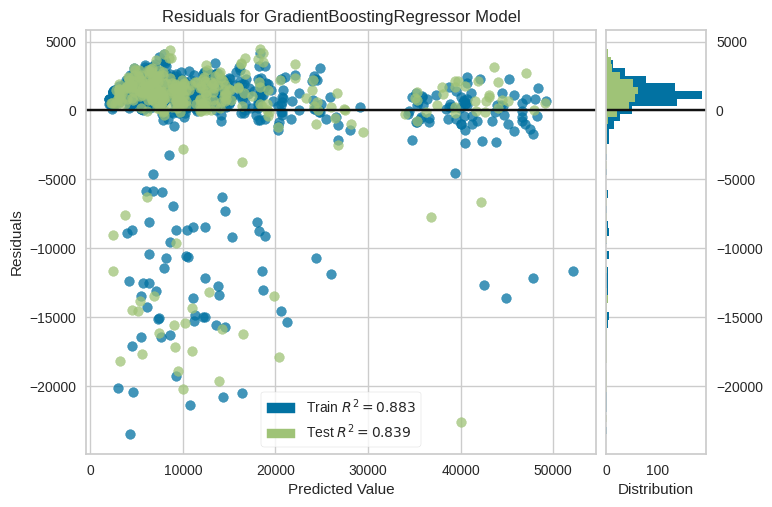

In [ ]:
# Plot residuals

plot_model(tuned_gbr, plot='residuals')

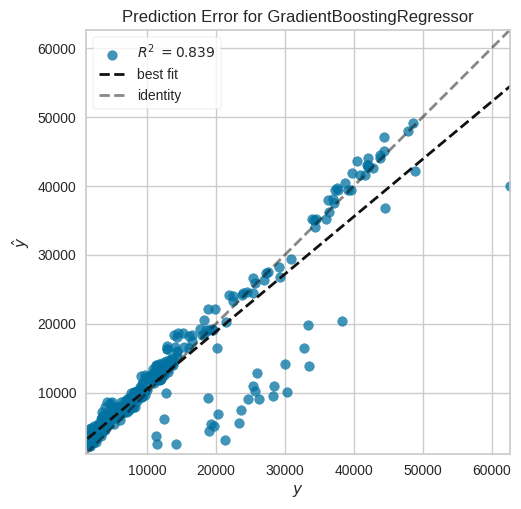

In [ ]:
# Plot the model errors

plot_model(tuned_gbr, plot="error")

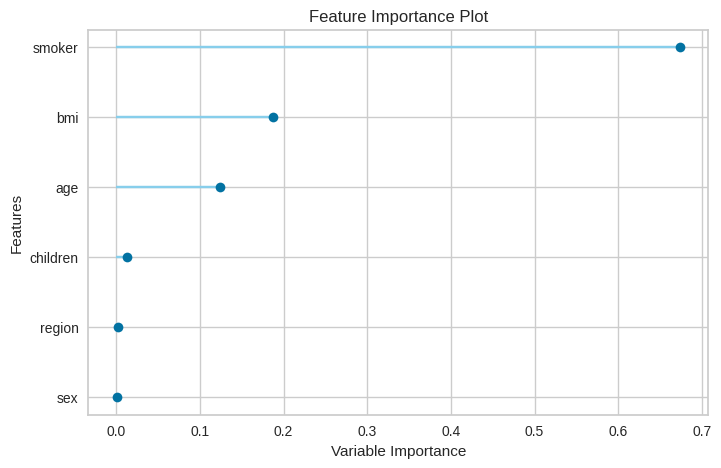

In [ ]:
# Feature Importance

plot_model(tuned_gbr, plot="feature")

❗The plot depics that the models feature importance is smoker feature which contributes majorly in deriving the charges for policyholders.

#### **Model generation using Sklearn package.**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define numerical columns
numerical_features = X.columns.tolist()

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())])  # Standardize features

# Define the model
gbr = GradientBoostingRegressor(random_state=123)

# Define the hyperparameter distribution for RandomizedSearch
param_dist = {
    'regressor__max_depth': randint(3, 11),  # Randomly sample depths between 3 and 10
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__n_estimators': randint(100, 501),  # Randomly sample n_estimators between 100 and 500
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__min_samples_split': randint(10, 31),  # Randomly sample splits between 10 and 30
    'regressor__min_samples_leaf': randint(4, 21)  # Randomly sample leaves between 4 and 20
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('regressor', gbr)
    ])

# Perform Randomized Search with 50 iterations
random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=50,
                                   cv=2, scoring='neg_mean_squared_error',
                                   n_jobs=-1, verbose=1, random_state=123)

# Fit the random search model
random_search.fit(X, y)

# Best model from random search
best_model = random_search.best_estimator_

# Fit the best model on training data
best_model.fit(train_X, train_y)

# Predict on validation set
pred_y = best_model.predict(valid_X)

# Calculate RMSE and R^2 score
test_rmse = mean_squared_error(valid_y, pred_y, squared=False)
test_r2 = r2_score(valid_y, pred_y)

# Print RMSE and R^2 score
print('Root Mean Square Error: {:.2f}'.format(test_rmse))
print('R^2 Score: {:.2f}'.format(test_r2))

# Print best hyperparameters
print("Best hyperparameters found: ", random_search.best_params_)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
Root Mean Square Error: 3971.86
R^2 Score: 0.90
Best hyperparameters found:  {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__min_samples_leaf': 15, 'regressor__min_samples_split': 20, 'regressor__n_estimators': 487, 'regressor__subsample': 0.9}


❗ The model shows a variance of 90% in the target variable. This is a strong indication that the model fits the data well.





#### ***Predicting Future Values***

In [ ]:
# Predicting charges for a new dataset

new_data = pd.DataFrame({
    'age': [19],
    'sex': [1],
    'bmi': [27.900],
    'children': [0],
    'smoker': [1],
    'region': [3]
})


# Make predictions using the trained best model
predictions = best_model.predict(new_data)

# Print the predictions
print('Predicted charges for the new data: {:.2f}'.format(predictions[0]))

Predicted charges for the new data: 18330.91
